In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Input,Reshape,Dense,Lambda,GlobalAveragePooling2D
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [1]:
dir0="E:/RCOEM/Sem 6/Project/diabetic-retino/diabetic-retinopathy2/diabetic-retinopathy/model/content/0_0"
dir1="E:/RCOEM/Sem 6/Project/diabetic-retino/diabetic-retinopathy2/diabetic-retinopathy/model/content/0_1"
dir2="E:/RCOEM/Sem 6/Project/diabetic-retino/diabetic-retinopathy2/diabetic-retinopathy/model/content/0_2"
dir3="E:/RCOEM/Sem 6/Project/diabetic-retino/diabetic-retinopathy2/diabetic-retinopathy/model/content/0_3"
dir4="E:/RCOEM/Sem 6/Project/diabetic-retino/diabetic-retinopathy2/diabetic-retinopathy/model/content/0_4"

In [ ]:
imgs=[]
label=[]

In [ ]:
import os
for i in os.listdir(dir0)[:3500]:
  img=plt.imread(dir0+"/"+i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #img = crop_image_from_gray(img)
  img = cv2.resize(img, (28,28))
  image=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , 2.8) ,-4 ,128) 
  imgs.append(np.array(img))
  label.append(0)



In [ ]:
for i in os.listdir(dir1)[:3500]:
  img=plt.imread(dir1+"/"+i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #img = crop_image_from_gray(img)
  img = cv2.resize(img, (28,28))
  img =cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , 2.8) ,-4 ,128)      
  imgs.append(np.array(img))
  label.append(1)
    
for i in os.listdir(dir2)[:3500]:
  img=plt.imread(dir2+"/"+i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #img = crop_image_from_gray(img)
  img = cv2.resize(img, (28,28))
  img =cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , 2.8) ,-4 ,128)      
  imgs.append(np.array(img))
  label.append(2)

In [ ]:
for i in os.listdir(dir3)[:3500]:
      img=plt.imread(dir3+"/"+i)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #img = crop_image_from_gray(img)
      img = cv2.resize(img, (50,50))
      img =cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , 2.8) ,-4 ,128)      
      imgs.append(np.array(img))
      label.append(3)

In [ ]:
for i in os.listdir(dir4)[:3500]:
      img=plt.imread(dir4+"/"+i)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #img = crop_image_from_gray(img)
      img = cv2.resize(img, (28,28))
      img =cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , 2.8) ,-4 ,128)      
      imgs.append(np.array(img))
      label.append(4)

In [ ]:
imgs = np.asarray(imgs)
label = np.asarray(label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(imgs,label,test_size=0.3,shuffle=True)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12250, 28, 28)
(12250,)
(5250, 28, 28)
(5250,)


In [ ]:
height,width = 128,128

# Resize the image size to (128, 128)
X_train = X_train.reshape((-1, 28, 28))
X_train = np.array([cv2.resize(x, dsize=(height, width)).astype(float) for x in X_train])
X_train = X_train.reshape((X_train.shape[0], height, width, 1))

X_test = X_test.reshape((-1,28,28))
X_test = np.array([cv2.resize(x, dsize=(height, width)).astype(float) for x in X_test])
X_test = X_test.reshape((X_test.shape[0], height, width, 1))


In [ ]:
y_binary_train = tf.one_hot(Y_train,5)
y_binary_test = tf.one_hot(Y_test,5)

In [ ]:
print(X_train.shape)
print(y_binary_train.shape)
print(X_test.shape)
print(y_binary_test.shape)

(12250, 128, 128, 1)
(12250, 5)
(5250, 128, 128, 1)
(5250, 5)


In [ ]:
# Define Image Data Generator for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   shear_range=0.1,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

# Define Image Generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
def mobile_net(height, width):
  
  # Define Input layer
  input = Input(shape=(height, width, 1))
  
  # Add a Reshape layer
  input_image = Reshape((height, width), input_shape=(height, width, 1))(input)
  
  # Add Lambda layer to expand the image to 3 channels
  input_image = Lambda(lambda x: K.repeat_elements(K.expand_dims(x,3),3,3))(input_image)
  
  # Create MobileNets base model with pre-trained weights
  base_model = MobileNet(input_shape=(height, width, 3),
                         input_tensor=input_image, 
                         weights='imagenet', 
                         include_top=False)

  # Add a global average pooling layer
  x = GlobalAveragePooling2D()(base_model.output)
  
  # Add output layer
  output = Dense(5, activation='softmax')(x)

  model = Model(inputs=input, outputs=output)
  return model


In [ ]:
# Instantiate a model
model = mobile_net(height, width)
# Show model summary
model.summary()
#plot_model(model, to_file='mobile_net.png', show_shapes=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 reshape (Reshape)           (None, 128, 128)          0         
                                                                 
 lambda (Lambda)             (None, 128, 128, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                             

In [ ]:
opt=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, epsilon=1e-7, decay=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="mobile_net.h5",
                               verbose=0,
                               save_best_only=True)

history = model.fit(train_datagen.flow(X_train, y_binary_train, batch_size=32, seed=42), 
                    validation_data=test_datagen.flow(X_test, y_binary_test, batch_size=32, seed=42),
                    callbacks=[checkpointer],
                    epochs = 100)

Epoch 1/100
383/383 [==============================] - 34s 75ms/step - loss: 1.1077 - accuracy: 0.5147 - val_loss: 0.9729 - val_accuracy: 0.5722
Epoch 2/100
383/383 [==============================] - 27s 71ms/step - loss: 0.9471 - accuracy: 0.5793 - val_loss: 0.9745 - val_accuracy: 0.5886
Epoch 3/100
383/383 [==============================] - 27s 71ms/step - loss: 0.9115 - accuracy: 0.5974 - val_loss: 1.1508 - val_accuracy: 0.5293
Epoch 4/100
383/383 [==============================] - 28s 72ms/step - loss: 0.8795 - accuracy: 0.6194 - val_loss: 0.9305 - val_accuracy: 0.5954
Epoch 5/100
383/383 [==============================] - 27s 71ms/step - loss: 0.8344 - accuracy: 0.6416 - val_loss: 0.9508 - val_accuracy: 0.5907
Epoch 6/100
383/383 [==============================] - 27s 71ms/step - loss: 0.7921 - accuracy: 0.6646 - val_loss: 0.8270 - val_accuracy: 0.6450
Epoch 7/100
383/383 [==============================] - 27s 70ms/step - loss: 0.7509 - accuracy: 0.6883 - val_loss: 0.8522 - val_ac

In [ ]:
def plot_learning_curves(history):
    plt.plot(history.history["accuracy"],label="Train Accuracy")
    plt.plot(history.history["val_accuracy"],label="Val Accuracy")
    plt.legend()
    plt.show()

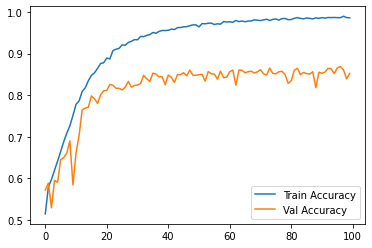

In [ ]:
plot_learning_curves(history)

In [ ]:
print('Results:\n')
print('The best validation accuracy is %.2f%%.' % (np.max(history.history["val_accuracy"])*100))

Results:

The best validation accuracy is 86.90%.


In [ ]:
score, acc = model.evaluate(test_datagen.flow(X_test, y_binary_test, batch_size=32, seed=42))
print('Test Loss =', score)
print('Test Accuracy =', acc)

165/165 [==============================] - 2s 14ms/step - loss: 0.6340 - accuracy: 0.8522
Test Loss = 0.6339656114578247
Test Accuracy = 0.8521904945373535


In [ ]:
import numpy as np
rounded_labels=np.argmax(y_binary_test, axis=1)
rounded_labels[1]

3

165/165 [==============================] - 2s 12ms/step


Text(33.0, 0.5, 'Actual')

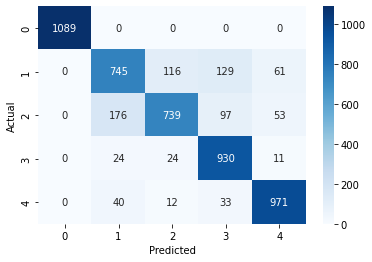

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_t=X_test/255
X_pred=model.predict(X_t)
max=[]
for i in X_pred:
  l=np.argmax(i)
  max.append(l)
cm_train=confusion_matrix(Y_test,max)
sns.heatmap(cm_train, annot=True,fmt='g', cmap='Blues',xticklabels=['0','1','2','3','4'],yticklabels=['0','1','2','3','4'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

383/383 [==============================] - 4s 12ms/step


Text(33.0, 0.5, 'Actual')

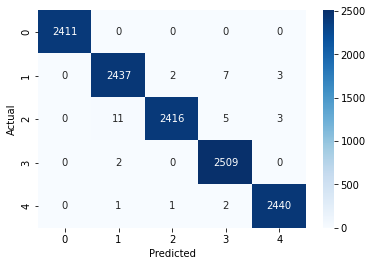

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_tr=X_train/255
X_pred=model.predict(X_tr)
max=[]
for i in X_pred:
  l=np.argmax(i)
  max.append(l)
cm_train=confusion_matrix(Y_train,max)
sns.heatmap(cm_train, annot=True,fmt='g', cmap='Blues',xticklabels=['0','1','2','3','4'],yticklabels=['0','1','2','3','4'])
plt.xlabel("Predicted")
plt.ylabel("Actual")